In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from segment_anything_adv import SamPredictor, SamAutomaticMaskGenerator, sam_model_registry
import yaml

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

In [3]:
yaml_path = "./config/base.yaml"
def read_yaml(yaml_path:str):
    yaml_file = open(yaml_path, "r", encoding="utf-8")
    file_data = yaml_file.read()
    yaml_file.close()
    return yaml.load(file_data, Loader=yaml.FullLoader)
params = read_yaml(yaml_path)

In [4]:
checkpoints = {
"vit_h": "./checkpoints/sam_vit_h_4b8939.pth",
"vit_b": "./checkpoints/sam_vit_b01ec64.pth"
}

model_type = "vit_b"
device = "cuda"
image_path = '/root/autodl-tmp/advout_0.01_0.4_100_8_64_0.85/CBCL/SSDB00001.JPG'


In [5]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
sam = sam_model_registry[model_type](checkpoint=checkpoints[model_type])
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(
        sam,
        points_per_side=params['points_per_side'],
        points_per_batch=params['points_per_batch'],
        pred_iou_thresh=params['pred_iou_thresh'],
        stability_score_thresh=params['stability_score_thresh'],
        stability_score_offset=params['stability_score_offset'],
        box_nms_thresh=params['box_nms_thresh'],
        crop_n_layers=params['crop_n_layers'],
        crop_nms_thresh=params['crop_nms_thresh'],
        crop_overlap_ratio=params['crop_overlap_ratio'],
        crop_n_points_downscale_factor=params['crop_n_points_downscale_factor'],
        point_grids=params['point_grids'],
        min_mask_region_area=params['min_mask_region_area'],
        output_mode=params['output_mode'],
)
masks = mask_generator.generate(image)

print(len(masks))
print(masks[0].keys())

81
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


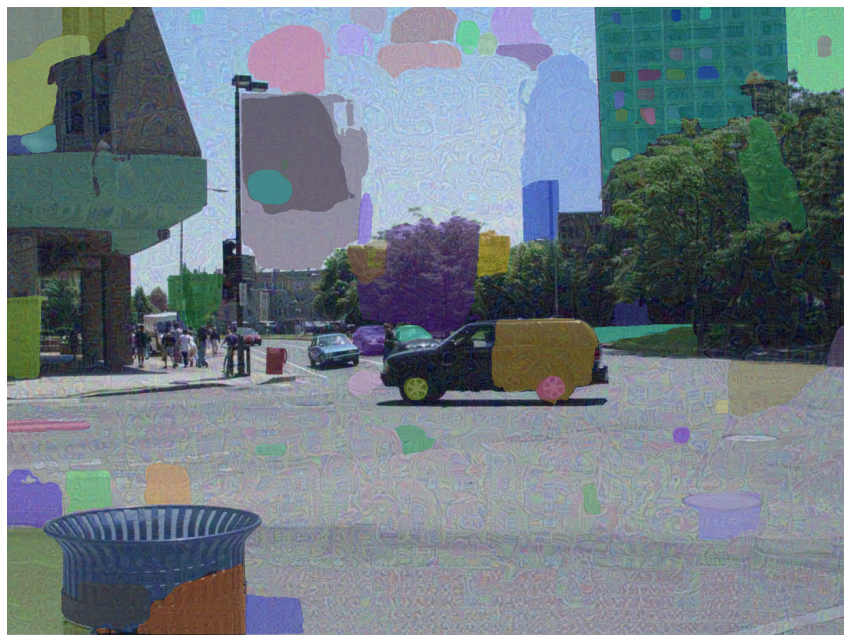

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()